In [131]:
import pandas as pd
import feather
import numpy as np
import csv
import datetime
from altair import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
# import seaborn as sns
# sns.set(color_codes=True)
pd.set_option('display.max_columns', 200)


In [107]:
plt.style.available

['seaborn-white',
 'seaborn-talk',
 'grayscale',
 'seaborn-muted',
 'seaborn-paper',
 'classic',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-poster',
 'fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'bmh',
 'dark_background',
 'seaborn-dark',
 'seaborn-ticks',
 'ggplot',
 'seaborn-colorblind']

In [2]:
meta = pd.read_csv("/Volumes/BigData/Science/hse_thesis/metadata_for_every_post_and_merged_texts/metadata.csv",
                   encoding="CP1251", header=None, error_bad_lines=False)

b'Skipping line 413210: expected 23 fields, saw 24\nSkipping line 413751: expected 23 fields, saw 24\n'
b'Skipping line 746133: expected 23 fields, saw 24\nSkipping line 746165: expected 23 fields, saw 24\n'
b'Skipping line 814139: expected 23 fields, saw 24\n'
b'Skipping line 902422: expected 23 fields, saw 24\nSkipping line 902467: expected 23 fields, saw 24\nSkipping line 902469: expected 23 fields, saw 24\n'
b'Skipping line 1022404: expected 23 fields, saw 24\nSkipping line 1047956: expected 23 fields, saw 24\n'
b'Skipping line 1356861: expected 23 fields, saw 24\nSkipping line 1356862: expected 23 fields, saw 24\nSkipping line 1356863: expected 23 fields, saw 24\nSkipping line 1356864: expected 23 fields, saw 24\nSkipping line 1356865: expected 23 fields, saw 24\nSkipping line 1356866: expected 23 fields, saw 24\nSkipping line 1356867: expected 23 fields, saw 24\nSkipping line 1356868: expected 23 fields, saw 24\nSkipping line 1356869: expected 23 fields, saw 24\nSkipping line 135

In [3]:
meta.shape

(8241864, 23)

In [4]:
meta.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,85978354,Wall 112465206,post 1,19.06.2011 4:58:53,Анатолий,Хайбулин,2,Советский,Ханты-Мансийский Автономный окру,Россия,1.0,0.0,0.0,0.0,0.0,0.0,36.0,789.0,272.0,0,0,0
1,2,28098487,Wall 28098487,post 249,20.01.2015 3:10:53,Валера,Гончаров,2,Майкоп,Адыгея,Россия,12.0,0.0,2.0,0.0,18.0,0.0,59.0,55.0,8.0,2,0,0
2,3,28098487,Wall 28098487,post 246,09.07.2014 16:21:49,Валера,Гончаров,2,Майкоп,Адыгея,Россия,12.0,0.0,2.0,0.0,18.0,0.0,59.0,55.0,8.0,1,0,0
3,4,28098487,Wall 28098487,post 245,09.07.2014 16:09:04,Валера,Гончаров,2,Майкоп,Адыгея,Россия,12.0,0.0,2.0,0.0,18.0,0.0,59.0,55.0,8.0,0,0,0
4,5,28098487,Wall 28098487,post 244,09.07.2014 16:00:54,Валера,Гончаров,2,Майкоп,Адыгея,Россия,12.0,0.0,2.0,0.0,18.0,0.0,59.0,55.0,8.0,0,0,0


In [5]:
meta.drop(0, axis=1, inplace=True)

In [6]:
col_names=["author_id", "wall_id", "post_comment_id", "date", "name", "surname", "sex", "city", "region",
      "country", "posts", "comments", "likes", "res_comments", "res_postlikes", "res_comments_likes",
       "friends", "groups", "followers", "post_likes", "post_repost", "post_comments"]
len(col_names)

22

In [7]:
meta.columns = col_names

In [8]:
meta.dtypes

author_id               int64
wall_id                object
post_comment_id        object
date                   object
name                   object
surname                object
sex                    object
city                   object
region                 object
country                object
posts                 float64
comments              float64
likes                 float64
res_comments          float64
res_postlikes         float64
res_comments_likes    float64
friends               float64
groups                float64
followers             float64
post_likes             object
post_repost            object
post_comments          object
dtype: object

In [9]:
num_fields = ["post_likes", "post_repost", "post_comments"]
for i in meta.columns:
    if i in num_fields:
        meta[i] = pd.to_numeric(meta[i], errors='coerce')

In [10]:
meta.isnull().sum()

author_id                  0
wall_id                    0
post_comment_id            0
date                   58402
name                  121481
surname                    0
sex                        0
city                       0
region                114341
country               114341
posts                 114341
comments              114341
likes                 114341
res_comments          114341
res_postlikes         114341
res_comments_likes    114341
friends               114341
groups                114341
followers             114341
post_likes            120918
post_repost           121063
post_comments         120918
dtype: int64

In [11]:
fields_for_first = ["posts", "comments", "likes", "res_comments", "res_postlikes", "res_comments_likes",
       "friends", "groups", "followers"]
agg = {}
for i in fields_for_first:
    agg[i] = "first"

In [12]:
agg

{'comments': 'first',
 'followers': 'first',
 'friends': 'first',
 'groups': 'first',
 'likes': 'first',
 'posts': 'first',
 'res_comments': 'first',
 'res_comments_likes': 'first',
 'res_postlikes': 'first'}

In [13]:
meta_author = meta.groupby("author_id").agg(agg)

In [167]:
meta_author["ff"] = meta_author["friends"] + meta_author["followers"]

In [29]:
meta_author.shape

(468866, 10)

In [168]:
meta_author.head()

,author_id,followers,res_comments_likes,likes,friends,res_comments,comments,res_postlikes,posts,groups,ff
0,188,321.0,0.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,382.0
1,494,724.0,0.0,7.0,304.0,0.0,0.0,0.0,1.0,14.0,1028.0
2,831,1780.0,0.0,0.0,476.0,0.0,0.0,0.0,10.0,45.0,2256.0
3,1073,2282.0,0.0,0.0,590.0,0.0,0.0,0.0,1.0,64.0,2872.0
4,1332,273.0,0.0,0.0,99.0,0.0,0.0,0.0,1.0,50.0,372.0


In [16]:
meta_author = meta_author[meta_author.index != 0]

In [17]:
meta_author = meta_author.reset_index()

In [169]:
meta_author.describe()

,author_id,followers,res_comments_likes,likes,friends,res_comments,comments,res_postlikes,posts,groups,ff
count,4.688660e+05,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000,467430.000000
mean,1.115921e+08,158.925495,0.171692,8.645175,218.452547,1.571074,1.257927,25.894876,16.124113,94.193824,377.378042
std,7.851411e+07,1422.262630,14.623871,120.919386,553.407692,31.245198,18.615803,370.677633,214.550376,177.895753,1589.548853
min,1.880000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.980163e+07,4.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,1.000000,10.000000,56.000000
50%,1.055339e+08,43.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,2.000000,41.000000,199.000000
75%,1.666892e+08,150.000000,0.000000,2.000000,229.000000,0.000000,0.000000,1.000000,4.000000,104.000000,400.000000
max,3.280245e+08,544564.000000,8467.000000,42702.000000,10000.000000,11775.000000,4088.000000,66793.000000,53285.000000,8369.000000,545050.000000


In [40]:
meta_author["friends"][meta_author["friends"] == 0].count()

74478

In [170]:
meta_author["friends"][meta_author["ff"] == 0].count()

68674

In [46]:
meta_author[meta_author["friends"] > 5000].sort_values("friends", ascending=False).head()

,author_id,followers,res_comments_likes,likes,friends,res_comments,comments,res_postlikes,posts,groups
113500,37944932,2844.0,0.0,0.0,10000.0,0.0,0.0,0.0,1.0,15.0
19989,5267290,1672.0,0.0,0.0,10000.0,0.0,0.0,0.0,2.0,2000.0
25149,6676138,1572.0,0.0,1.0,10000.0,0.0,0.0,0.0,1.0,76.0
380620,185913560,4556.0,0.0,0.0,10000.0,0.0,0.0,2.0,1.0,126.0
185219,73396753,7430.0,1.0,36.0,10000.0,1.0,0.0,1.0,1.0,4.0


In [184]:
meta_author_ok = meta_author[(meta_author["friends"] > 0)]

In [194]:
meta_author_ok.shape

(392952, 11)

In [185]:
meta_author_ok.describe()

,author_id,followers,res_comments_likes,likes,friends,res_comments,comments,res_postlikes,posts,groups,ff
count,3.929520e+05,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000,392952.000000
mean,1.125235e+08,186.878708,0.199017,9.857252,259.856863,1.791667,1.419481,30.619104,18.615314,106.586117,446.735571
std,7.913045e+07,1529.534963,15.942676,131.632571,594.598922,34.021931,20.225046,404.001452,233.735947,186.187911,1706.903385
min,1.880000e+02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.985437e+07,17.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,1.000000,18.000000,122.000000
50%,1.077062e+08,66.000000,0.000000,0.000000,146.000000,0.000000,0.000000,0.000000,2.000000,51.000000,249.000000
75%,1.681353e+08,178.000000,0.000000,3.000000,258.000000,0.000000,0.000000,1.000000,4.000000,118.000000,451.000000
max,3.280245e+08,544564.000000,8467.000000,42702.000000,10000.000000,11775.000000,4088.000000,66793.000000,53285.000000,8369.000000,545050.000000


In [174]:
meta_author["friends"].value_counts()

0.0       74478
1.0        3755
2.0        2524
3.0        1892
4.0        1630
85.0       1531
100.0      1527
87.0       1515
92.0       1515
99.0       1511
78.0       1506
70.0       1502
95.0       1497
94.0       1495
71.0       1494
75.0       1493
91.0       1490
74.0       1489
60.0       1484
98.0       1479
80.0       1479
103.0      1476
55.0       1474
90.0       1471
79.0       1470
86.0       1470
84.0       1467
76.0       1464
82.0       1464
5.0        1458
          ...  
5506.0        1
5505.0        1
3725.0        1
9376.0        1
5502.0        1
5501.0        1
5498.0        1
4758.0        1
5900.0        1
7445.0        1
4196.0        1
5523.0        1
5549.0        1
8472.0        1
3711.0        1
2408.0        1
5896.0        1
3100.0        1
2771.0        1
2769.0        1
5537.0        1
7426.0        1
2986.0        1
3715.0        1
3719.0        1
2414.0        1
7443.0        1
5525.0        1
3722.0        1
4748.0        1
Name: friends, dtype: in

In [175]:
meta_author_ok.shape

(398756, 11)

In [176]:
meta_author_ok.head()

,author_id,followers,res_comments_likes,likes,friends,res_comments,comments,res_postlikes,posts,groups,ff
0,188,321.0,0.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,382.0
1,494,724.0,0.0,7.0,304.0,0.0,0.0,0.0,1.0,14.0,1028.0
2,831,1780.0,0.0,0.0,476.0,0.0,0.0,0.0,10.0,45.0,2256.0
3,1073,2282.0,0.0,0.0,590.0,0.0,0.0,0.0,1.0,64.0,2872.0
4,1332,273.0,0.0,0.0,99.0,0.0,0.0,0.0,1.0,50.0,372.0


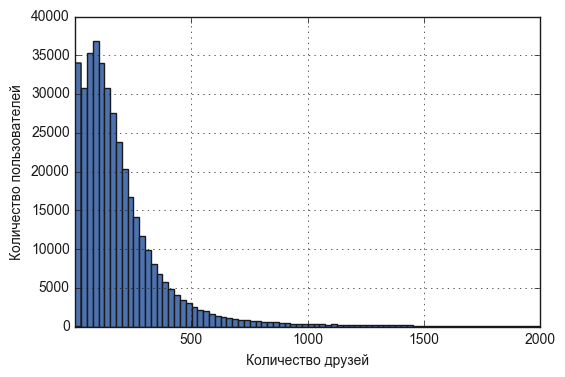

In [183]:
ax = meta_author_ok["friends"].hist(bins=400)
ax.set_xlim([1, 2000])
fig = ax.get_figure()
plt.xlabel('Количество друзей')
plt.ylabel("Количество пользователей")
fig.savefig("/Users/Hun/GoogleDrive/LINIS/Отчёт по проекту/imgs/num_of_friends_hist.png", dpi=300)

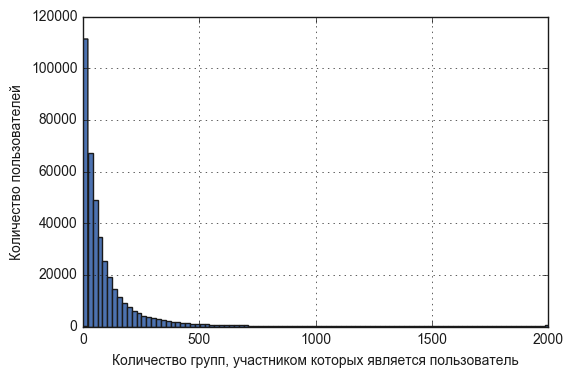

In [178]:
ax = meta_author_ok["groups"].hist(bins=400)
fig = ax.get_figure()
ax.set_xlim([0, 2000])
plt.xlabel('Количество групп, участником которых является пользователь')
plt.ylabel("Количество пользователей")
fig.savefig("/Users/Hun/GoogleDrive/LINIS/Отчёт по проекту/imgs/num_of_groups_hist.png", dpi=300)

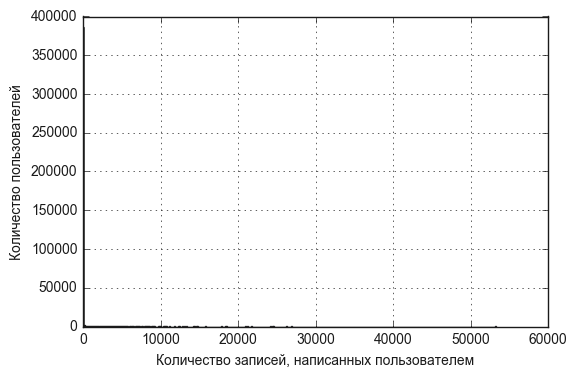

In [187]:
ax = meta_author_ok["posts"].hist(bins=400)
fig = ax.get_figure()
#ax.set_xlim([0, 2000])
plt.xlabel('Количество записей, написанных пользователем')
plt.ylabel("Количество пользователей")
fig.savefig("/Users/Hun/GoogleDrive/LINIS/Отчёт по проекту/imgs/num_of_posts_hist.png", dpi=300)

In [198]:
meta_author_ok["posts"][meta_author_ok["posts"] <= 1].count()/len(meta_author_ok)

0.46882825383252918

In [195]:
meta_author_ok["posts"].value_counts()

1.0        184227
2.0         66309
3.0         34817
4.0         20945
5.0         14243
6.0         10112
7.0          7576
8.0          5937
9.0          4659
10.0         3672
11.0         3089
12.0         2636
13.0         2163
14.0         1890
15.0         1670
16.0         1358
17.0         1238
18.0         1119
19.0         1083
20.0          887
21.0          825
22.0          754
23.0          711
24.0          607
25.0          585
26.0          555
27.0          488
28.0          484
29.0          442
30.0          380
            ...  
2554.0          1
1974.0          1
814.0           1
1600.0          1
10409.0         1
1315.0          1
1751.0          1
3926.0          1
2322.0          1
877.0           1
10389.0         1
2052.0          1
1652.0          1
5191.0          1
4272.0          1
1297.0          1
1090.0          1
3015.0          1
2590.0          1
5179.0          1
1757.0          1
3515.0          1
2586.0          1
2585.0          1
1376.0    